In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearnex import patch_sklearn

patch_sklearn()


## Data loading

In [3]:
# df = pd.read_csv(
#     "https://raw.githubusercontent.com/bensonnd/msds/ds7333-neil/ds7333/case_study_6/Data/all_train.csv"
# )

# df = pd.read_csv("./Data/all_train.csv")


# # sampling to reduce work load on the pc
# df = df.sample(n=50000, random_state=0, ignore_index=True)


In [4]:
# df.to_csv("./Data/all_train_sample.csv", index=False, encoding='utf-8')

df = pd.read_csv("./Data/all_train_sample.csv")


In [5]:
df.head(5)

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,0.0,0.182885,-0.146315,1.103312,-1.389159,-1.516026,-1.054221,-1.099931,-1.014486,1.691438,...,-0.881244,-1.009491,-0.272693,1.743123,-0.257826,-1.230639,-0.347981,-0.650235,-1.249918,750.000000
1,0.0,-0.102887,0.250511,1.307209,1.234859,1.453412,-0.005984,-0.515567,-1.116264,-0.716042,...,1.349004,-0.735121,0.973644,1.743123,-0.772438,-0.418078,-0.393534,0.466642,0.302147,1250.000000
2,0.0,-1.062009,-0.093634,-0.305799,-0.062818,-1.511803,-0.005984,-0.036428,-0.529650,0.516288,...,0.521176,1.278940,1.075888,1.743123,-0.211657,0.983392,-0.327313,-0.545430,-0.234440,1250.000000
3,1.0,-0.951812,-1.922774,1.551131,1.204483,1.406985,0.850488,-0.579133,-0.211268,-0.580277,...,0.855941,0.208405,0.496576,1.743123,0.378269,-0.333452,-0.352584,2.557266,1.419620,499.999969
4,0.0,0.614001,-1.534331,1.088496,-0.361738,1.587452,-1.054221,-0.433399,-2.178266,-0.748898,...,-0.882768,-2.061908,1.543182,-0.573682,-0.030133,-0.230967,-0.381699,0.190802,-0.918209,499.999969


 Because we see that mass is orders of magnitude higher than all other fields, we will normalize/scale the data

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   # label  100000 non-null  float64
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   f3       100000 non-null  float64
 5   f4       100000 non-null  float64
 6   f5       100000 non-null  float64
 7   f6       100000 non-null  float64
 8   f7       100000 non-null  float64
 9   f8       100000 non-null  float64
 10  f9       100000 non-null  float64
 11  f10      100000 non-null  float64
 12  f11      100000 non-null  float64
 13  f12      100000 non-null  float64
 14  f13      100000 non-null  float64
 15  f14      100000 non-null  float64
 16  f15      100000 non-null  float64
 17  f16      100000 non-null  float64
 18  f17      100000 non-null  float64
 19  f18      100000 non-null  float64
 20  f19      100000 non-null  f

In [7]:
df.columns


Index(['# label', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'mass'],
      dtype='object')

## Checking for missing values

In [8]:
df.columns[df.isnull().any()].tolist()


[]

 No missing values to impute

## Check for duplicate rows

In [9]:
dups = df.duplicated().sum()
f"{dups/len(df)*100:.2f}% of all records are considered duplicates"

# source:
# https://stackoverflow.com/questions/35584085/how-to-count-duplicate-rows-in-pandas-dataframe


'0.00% of all records are considered duplicates'

## Check for duplicate columns

In [10]:
df.columns.duplicated()


# Since all the attributes are continuous, checking for any colinearity between them by plotting correlation matrix

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

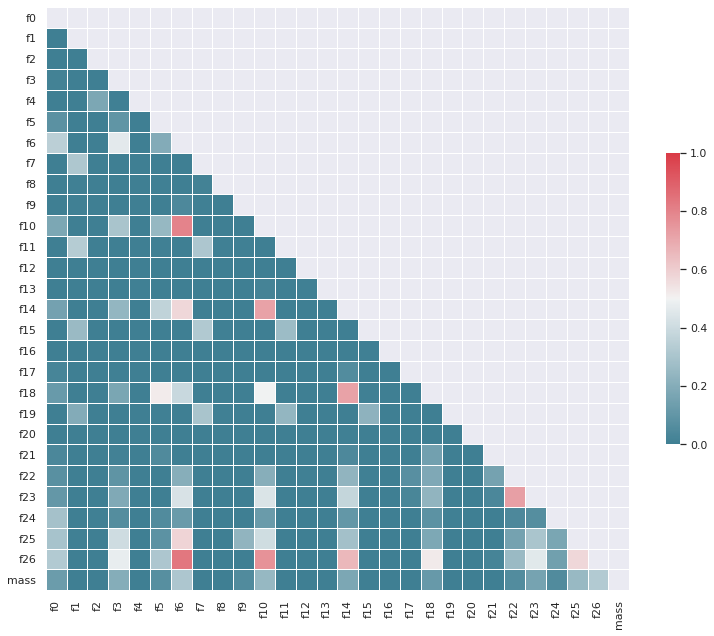

In [11]:
# plot the correlation matrix using seaborn
sns.set(style="darkgrid")

# Compute the correlation matrix
corr = df.loc[:, df.columns != "# label"].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmin=0,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

f.tight_layout()

 Most of the columns show little to no correlation, however
 we see high degrees of correlation between f6 & f10, f6 & f26, and f10 & f26

In [12]:
print(f"Correlation between f10 and f6: {df['f10'].corr(df['f6']):.2f}")
print(f"Correlation between f10 and f26: {df['f10'].corr(df['f26']):.2f}")
print(f"Correlation between f26 and f6: {df['f26'].corr(df['f6']):.2f}")


Correlation between f10 and f6: 0.80
Correlation between f10 and f26: 0.76
Correlation between f26 and f6: 0.83


In [13]:
# Removing f6 because it is redundant, and highly correlated with both f26 and f10
df = df.drop(["f6"], axis=1)


## Setting data and target Sets

In [14]:
X = df.loc[:, df.columns != "# label"]
X_col_names = list(X.columns)
y = df["# label"]

# deleting to save space
del df


 Now let's check out the distribution of all the predictors

In [15]:
a = 1

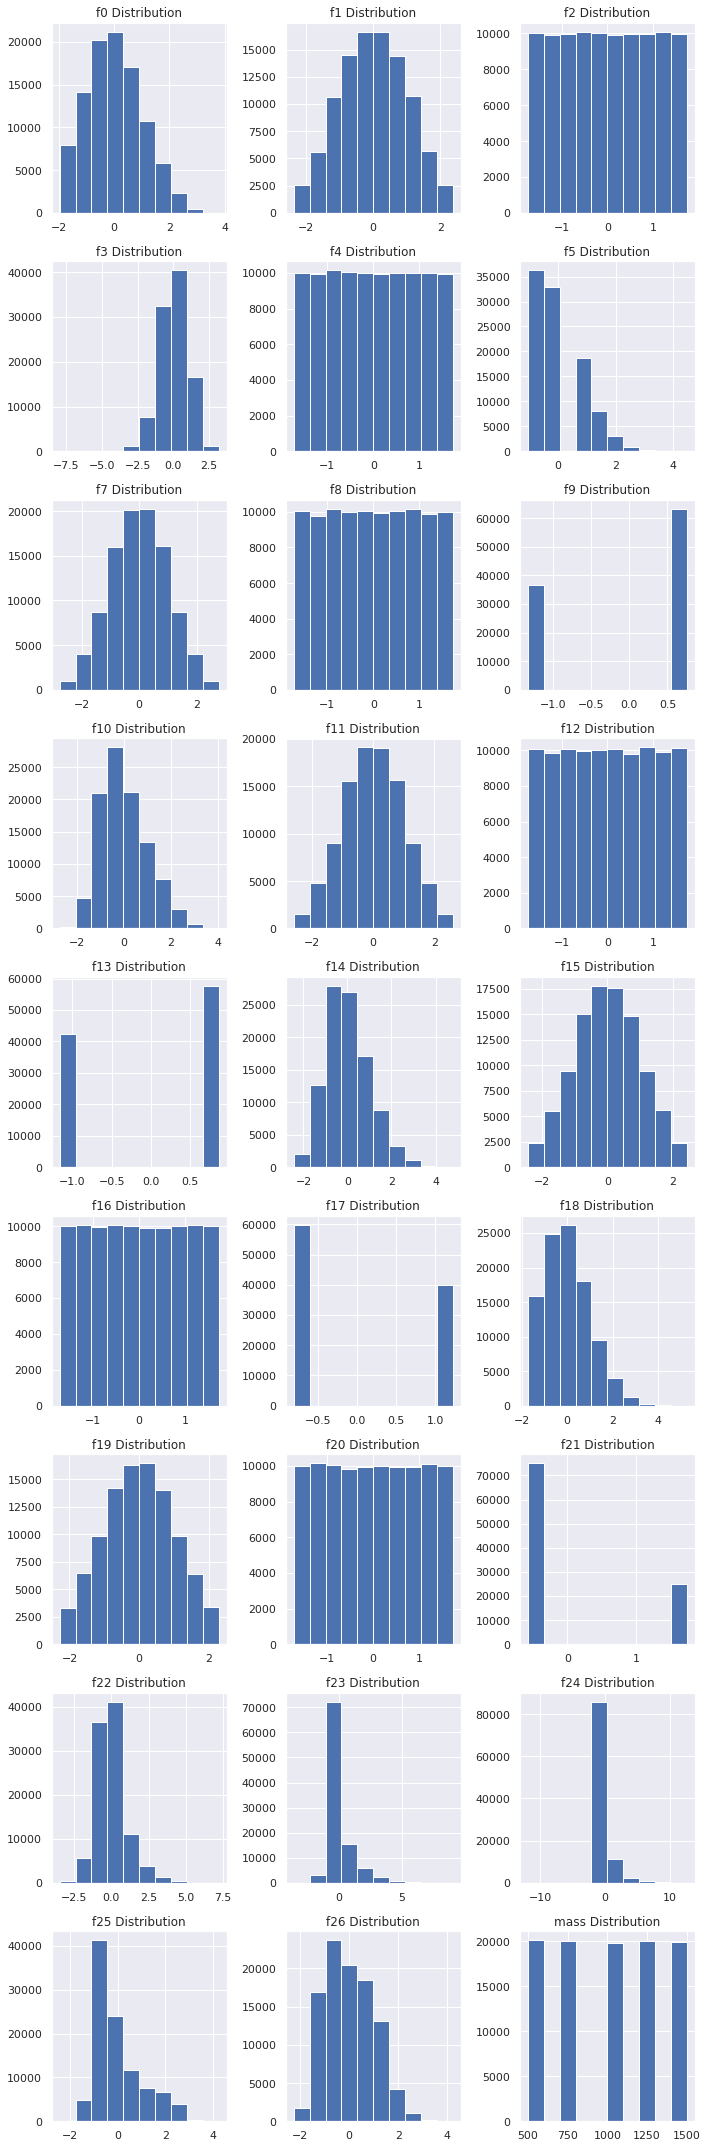

In [16]:
# checking to see if the attributes are normally distributed, if not transform
import math

n_rows = 9
n_cols = 3


def draw_histograms(df, n_cols=3):
    n_rows = math.ceil(len(df.columns) / n_cols)
    fig = plt.figure(figsize=(10, 30))
    for i, var_name in enumerate(df.columns):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        df[var_name].hist(bins=10, ax=ax)
        ax.set_title(var_name + " Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


draw_histograms(df=X)



 We see that there is some right skew in f0, f5, f10, f14, f18, f22, f23, f24, f25, and f26
 Similarly, we see some slieght left skew in f3

In [17]:
# right_skew = ["f0", "f5", "f10", "f14", "f18", "f22", "f23", "f24", "f25", "f26"]
# left_skew = ["f3"]

# for skew in right_skew:
#     X[skew] = np.log(X[skew] + 0.01)

# for skew in left_skew:
#     X[skew] = X[skew] ** 2


 checking the transformed distributions

In [18]:
# draw_histograms(df=X[right_skew])

# # %% [markdown]
# # checking the transformed distributions
# # %%
# draw_histograms(df=X[left_skew])



 Checking the balance of the target


There are 50134.0 classified as 1, and 49866.0 classified 0 making this an almost perfectly balanced target.


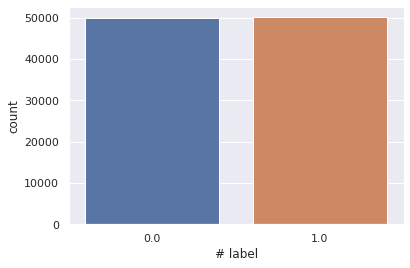

In [19]:
sns.countplot(x=y)
on = y.sum()
off = len(y) - on

print(
    f"\nThere are {on} classified as 1, and {off} classified 0 making this an almost perfectly balanced target."
)

 Because the class label is balanced, we don't need to stratify the split, we will simply
 use `train_test_split`. Setting the X and y test and train data.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=0,
)
del X  # to save space
del y  # to save space


## Scaling the Data
 Keeping our test and training sets separate and scaling them independently to avoid data snooping.

In [21]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


## Convert np arrays back to dataframes

In [22]:
y_train, y_test = y_train.to_frame(name="label"), y_test.to_frame(name="label")
X_train = pd.DataFrame(X_train, columns=X_col_names)
X_test = pd.DataFrame(X_test, columns=X_col_names)

# resetting the indeces
y_test.reset_index()
y_train.reset_index()
X_test.reset_index()
X_train.reset_index()


,index,f0,f1,f2,f3,f4,f5,f7,f8,f9,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,0,-0.549809,-0.976175,-0.650642,0.667016,-0.853873,-0.013232,-0.983620,1.102443,-1.309967,...,-0.515357,-0.041756,1.253246,1.739162,0.718616,-0.468926,-0.312552,-0.566050,-0.983676,-1.408791
1,1,-0.614983,-0.844679,1.018711,-0.328782,-0.594450,-1.061929,-0.955016,-0.084611,0.763378,...,-0.554677,-0.307056,1.381975,-0.574990,0.040319,-0.059520,0.321920,-0.849381,-1.324810,-1.408791
2,2,-0.368052,0.226527,-1.613881,-0.137088,0.514679,0.843616,1.250895,1.420064,0.763378,...,0.485751,-0.547724,-1.387660,1.739162,-1.092779,-0.486728,0.955024,-0.120476,-0.368186,0.004201
3,3,0.531557,0.627489,0.424899,-1.712682,-0.119057,-0.013232,0.819070,-1.587088,0.763378,...,0.131343,0.195710,-0.877847,-0.574990,0.394311,-0.519566,-0.340848,-0.524477,-0.937553,-1.408791
4,4,-0.687771,0.814831,-0.706910,0.240921,-1.440122,0.843616,-0.011412,0.897747,0.763378,...,-1.019078,-1.045633,-0.737690,-0.574990,-0.298083,-0.308602,-0.361031,0.195814,-0.747338,0.710698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,74995,1.384867,0.970293,1.435021,1.144946,1.254561,0.843616,0.153682,-0.534210,-1.309967,...,1.775540,1.109881,1.028576,1.739162,0.784222,0.606148,-0.250468,-0.835722,0.740880,0.004201
74996,74996,0.824189,0.479254,0.929816,-0.882394,0.472688,2.749161,0.320225,-0.366771,0.763378,...,-0.973512,-0.921148,-1.588648,-0.574990,-0.059242,-0.342258,-0.355356,-0.076517,-0.381953,1.417194
74997,74997,-0.731463,0.566783,-0.600069,-1.116242,-1.419702,1.568070,-1.003849,-0.914717,0.763378,...,0.804397,-1.530040,0.250427,-0.574990,0.443371,-0.477027,-0.361701,-0.833763,-0.419964,-1.408791
74998,74998,0.164816,0.787423,1.498054,-0.491487,-1.605727,1.568070,-0.635776,0.245061,-1.309967,...,1.520864,-1.172076,-1.431771,1.739162,0.420031,0.088084,-0.395707,-1.251870,0.051674,-0.702295


## Setting input nodes

In [23]:
input_nodes = len(X_col_names)
